Saturation curves for SM-omics and ST<br>

Input files are generated by counting number of unique molecules and number of annotated reads per annotated region after adjusting for sequencing depth, in downsampled fastq files (proportions 0.001, 0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1) processed using ST-pipeline.<br>


In [1]:
%matplotlib inline
import os
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import glob
import warnings
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
warnings.filterwarnings('ignore')

In [4]:
def condition(row):
    """ Takes row in pandas df as input and returns type of condition
    """
    # The samples are run in triplicate based on condition
    condition = ['sm-omics', 'ST']

    if row['Name'] in ['10015CN45_C2', '10015CN45_D2', '10015CN45_E2']:
        return condition[0]
        
    elif row['Name'] in ['10015CN45_C1', '10015CN45_D1', '10015CN45_E1']:
        return condition[1]

In [5]:
# Load input files
path = '../../smomics_data'

stats_list = []

samples_list = ['10015CN45_C1', '10015CN45_D1', '10015CN45_E1', '10015CN45_C2', '10015CN45_D2', '10015CN45_E2']
    
prop_list = [0.001, 0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1]
    
for filename in samples_list:
    
    cond_file = pd.read_csv(os.path.join(path, filename + '_umi_after_seq_depth_in_spots_under_outside_tissue.txt'), sep = '\t')

    print(cond_file)
    
    cond_file.sort_values(by='Num reads', inplace=True)
    cond_file['Prop_annot_reads'] = prop_list
    
    cond_file['Condition'] = cond_file.apply(lambda row: condition(row), axis = 1)
    cond_file['norm uniq mol inside'] = cond_file['UMI inside'] 
    cond_file['norm uniq mol outside'] = cond_file['UMI outside'] 

    stats_list.append(cond_file)

# Concat all files
cond_merge = pd.concat(stats_list)
    

           Name   UMI inside  UMI outside  Annot reads  Num reads
0  10015CN45_C1  2174.096154  2426.969889      2915987   10673935
1  10015CN45_C1     5.170418     8.098884        47467     175246
2  10015CN45_C1   643.214744   817.164818       971166    3556180
3  10015CN45_C1    77.326923   137.117834       241880     887022
4  10015CN45_C1  1439.641026  1666.085851      1943474    7115058
5  10015CN45_C1  3481.330128  3763.157480      4860401   17791691
6  10015CN45_C1  2852.875000  3110.691339      3888801   14232813
7  10015CN45_C1     0.140893     0.245791         4024      15097
8  10015CN45_C1   245.679487   360.888712       485788    1776741
           Name   UMI inside  UMI outside  Annot reads  Num reads
0  10015CN45_D1    39.737805    65.273026       157149     658524
1  10015CN45_D1   129.501520   190.091803       312814    1313327
2  10015CN45_D1  1783.820669  1940.364228      2492809   10480576
3  10015CN45_D1  2204.857143  2363.357143      3116320   13099789
4  10015CN

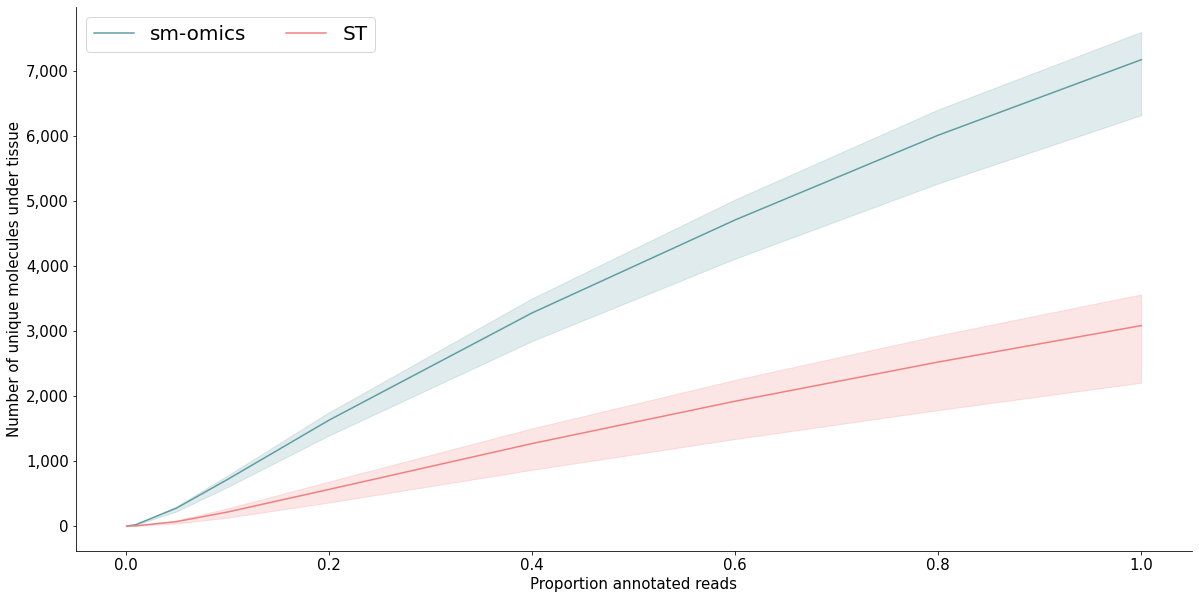

In [6]:
#Plot 
fig = plt.figure(figsize=(20, 10))
x="Prop_annot_reads"
y="norm uniq mol inside"
#y="Genes"
hue='Condition'

################ LINE PLOT

ax = sns.lineplot(x=x, y=y, data=cond_merge,hue=hue, 
                  palette =['cadetblue', 'lightcoral'], hue_order = ['sm-omics', 'ST'],ci=95)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('k')
ax.spines['left'].set_color('k')

# X and y label size
ax.set_xlabel("Proportion annotated reads", fontsize=15)
ax.set_ylabel("Number of unique molecules under tissue", fontsize=15)

# Set ticks size
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)

# change background color
back_c = 'white'
ax.set_facecolor(back_c)
ax.grid(False)

# Thousand seprator on y axis
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# LEGEND
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=['sm-omics', 'ST'],loc='upper left', ncol=2, fontsize=20)


fig.set_size_inches(20, 10)
# plt.savefig("../../figures/saturation_sm_st_total_umis_inside_cancer.pdf", transparent=True, bbox_inches = 'tight',
#      pad_inches = 0, dpi=1200)
plt.show()

In [7]:
cond_file['Prop_annot_reads'] = 100*cond_file['Prop_annot_reads']

In [8]:
cond_merge.to_csv('../../smomics_data/sm_st_unique_molecules_under_outside_tissue_cancer.csv')